

# Summer 2022 Data Science Intern Challenge 

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!


**Question 1: Given some sample data, write a program to answer the following: click here to access the required data set**

*On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.* 

- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
- What metric would you report for this dataset?
- What is its value?


**Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.**

- How many orders were shipped by Speedy Express in total?
- What is the last name of the employee with the most orders?
- What product was ordered the most by customers in Germany?





# Question 1


**Think about what could be going wrong with our calculation.**

As the mean is coming out to be so large, which it should not, there has to outliers in the dataset. 

**Think about a better way to evaluate this data**

We can potentially evaluate the data in a better way by either using median order value or removing the outliers. I would show that removing the outliers and then calculating the AOV is a better solution. 

In [9]:
import numpy as np  # package for Algebra
import pandas as pd  # package for Data Processing
import seaborn as sns  # package for Data Visualization
import matplotlib.pyplot as plt  # package for Data Visualization

In [4]:
db = pd.read_excel('/content/2019 Winter Data Science Intern Challenge Data Set.xlsx')
db.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [8]:
db.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


We can see that AOV is 3145.13 and MOV is 284

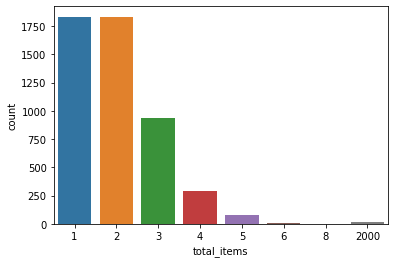

In [12]:
sns.countplot(x=db['total_items'])

We can see that the number of shoes bought in few of orders is very huge (2000)
and all the other orders are really small (< 10). These larg orders might be increasing the mean. 

In [14]:
db[db['total_items'] <= 10].describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398
std,1443.090253,29.051718,86.800308,5314.092293,0.98318
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000


We can see that even after removing the huge orders the mean and median are not close to eatch other, thus the next thing to analyse is the average price of shoes. 


,count,mean,std,min,25%,50%,75%,max
shop_id,,,,,,,,
92,42.0,90.0,0.0,90.0,90.0,90.0,90.0,90.0
2,55.0,94.0,0.0,94.0,94.0,94.0,94.0,94.0
32,42.0,101.0,0.0,101.0,101.0,101.0,101.0,101.0
100,40.0,111.0,0.0,111.0,111.0,111.0,111.0,111.0
7,56.0,112.0,0.0,112.0,112.0,112.0,112.0,112.0
...,...,...,...,...,...,...,...,...
99,54.0,195.0,0.0,195.0,195.0,195.0,195.0,195.0
89,61.0,196.0,0.0,196.0,196.0,196.0,196.0,196.0
12,53.0,201.0,0.0,201.0,201.0,201.0,201.0,201.0


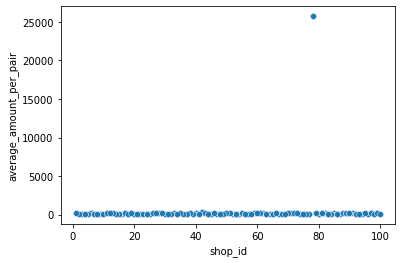

In [39]:
db['average_amount_per_pair'] = db['order_amount']/db['total_items']
sns.scatterplot(data = db, x='shop_id', y='average_amount_per_pair')
db.groupby('shop_id').describe()['average_amount_per_pair'].sort_values('max')


We can see that average price of shoes shoes at shop 78 is 25725, which is a huge outlier, and all the other shops have prices below 400, so let us now remove all the orders above 400 and see how the AOV changes.  

In [40]:
db[db['average_amount_per_pair'] <= 400].describe()

,order_id,shop_id,user_id,order_amount,total_items,average_amount_per_pair
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


In [41]:
db[db['average_amount_per_pair'] <= 400][db['shop_id'] == 78]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,average_amount_per_pair


And there is no order in shop 78 for which the price of average pair is below 400.

In [42]:
db_without_outliers = db[db['shop_id'] != 78]
db_without_outliers = db_without_outliers[db_without_outliers['total_items'] <= 10]
db_without_outliers.describe()

,order_id,shop_id,user_id,order_amount,total_items,average_amount_per_pair
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


Thus removing the outliers, we get AOV: 302.58, and we have fould out that the AOV was coming out to be large before becuse of store 78, as they were selling pair of shoes at average 25,725 dollars. 

**What is its value?**

The AOV after remving the outliers is: 302.58

# Question 2

**How many orders were shipped by Speedy Express in total?**
```sql
SELECT COUNT(OrderID) FROM Orders JOIN Shippers ON
Orders.ShipperID == Shippers.ShipperID
WHERE ShipperName = 'Speedy Express'
```

Answer: 54


**What is the last name of the employee with the most orders?**

```sql
SELECT LastName FROM Employees
WHERE EmployeeID = 
        (SELECT EmployeeID FROM Orders
         GROUP BY EmployeeID ORDER BY COUNT(OrderID) DESC)
LIMIT 1;
```

Answer: Peacock


**What product was ordered the most by customers in Germany?**

```sql
SELECT ProductName FROM Products
WHERE ProductID IN 
  (SELECT ProductID FROM OrderDetails
   WHERE OrderID IN 
    (SELECT OrderID FROM Orders
     JOIN Customers ON Orders.CustomerID = Customers.CustomerID
     WHERE Country = 'Germany')
   GROUP BY ProductID
   ORDER BY COUNT(OrderDetailID) DESC LIMIT 1);
```

Answer: Gorgonzola Telino
